<a href="https://colab.research.google.com/github/pytee/geminiintro/blob/main/Video_Prompting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.2 MB/s eta 0:00:00


In [2]:
# Get the API key from here: https://ai.google.dev/tutorials/setup
# Create a new secret called "GEMINI_API_KEY" via Add-ons -> Secrets in the top menu, and attach it to this notebook.
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
from IPython.display import Video

import pathlib
import textwrap
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
!pip install pytube
from pytube import YouTube

YouTube('https://www.youtube.com/shorts/I_UXIppRUWk').streams.get_highest_resolution().download()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 922.6 kB/s eta 0:00:00


'/content/How to fold POCKET SQUARE under 15 seconds!.mp4'

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF                                ;
    border-radius: 2px;       
    border: 2px solid #FFF6D8;">

Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm import tqdm
import subprocess

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #17191e                                ;
    border-radius: 2px;
    color :  #FFFAEC  ;        
    border: 2px solid #FFF6D8;">
Checking the file name of the only file in the directory

In [6]:
!apt-get install -y ffmpeg

input_file = "/content/How to fold POCKET SQUARE under 15 seconds!.mp4"
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'mp4_converted_video.mp4'
                ]
              )



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


CompletedProcess(args=['ffmpeg', '-i', '/content/How to fold POCKET SQUARE under 15 seconds!.mp4', '-qscale', '0', 'mp4_converted_video.mp4'], returncode=0)

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #17191e                                ;
    border-radius: 2px;
    color :  #FFFAEC  ;        
    border: 2px solid #FFF6D8;">
    
- Playing the video

In [7]:
ipd.Video('mp4_converted_video.mp4', embed=True)

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #17191e                                ;
    border-radius: 2px;
    color :  #FFFAEC  ;        
    border: 2px solid #FFF6D8;">

- Using [OpenCV](https://opencv.org/) in Python to create a VideoCapture object to read frames from a video file named 'mp4_converted_video.mp4'
    

In [8]:
cap = cv2.VideoCapture('mp4_converted_video.mp4')

In [9]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

334.0

In [10]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 1280.0, Width 720.0


In [11]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 25.00


In [12]:
cap = cv2.VideoCapture('mp4_converted_video.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (1280, 720, 3)


<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #17191e                                ;
    border-radius: 2px;
    color :  #FFFAEC  ;        
    border: 2px solid #FFF6D8;">

- Plotting some of the frames to visualise the images
    
    

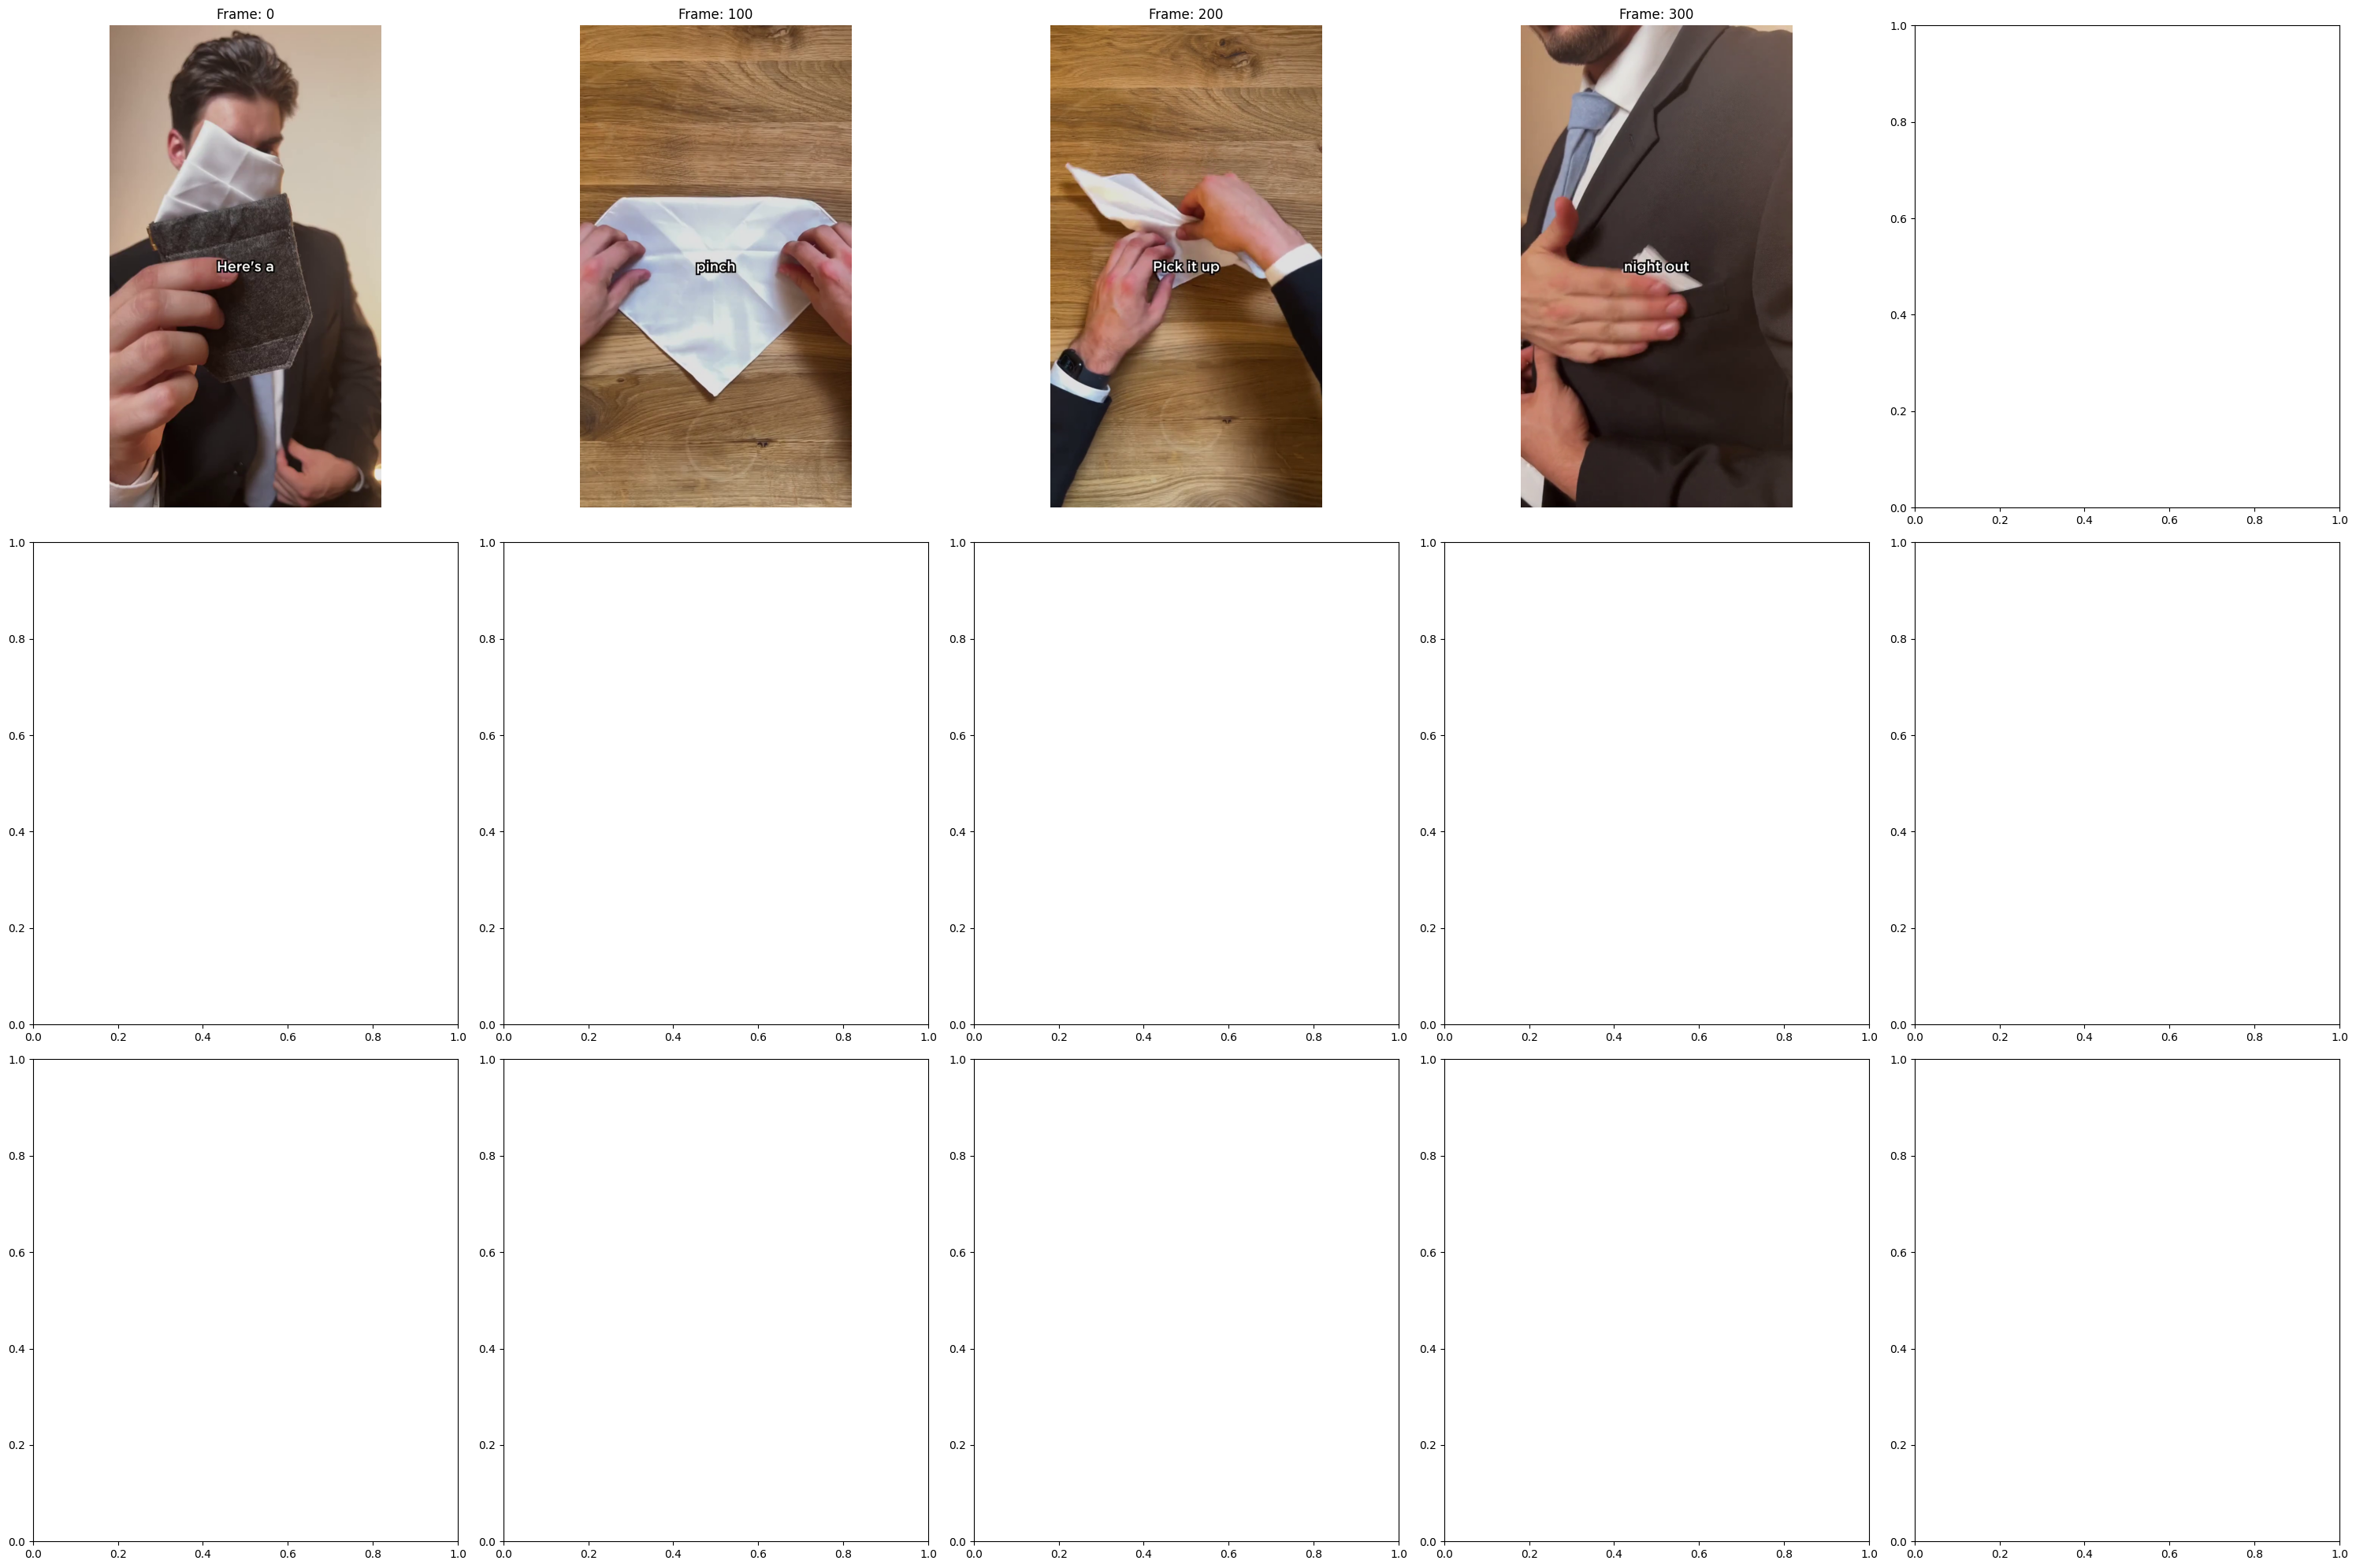

In [23]:
fig, axs = plt.subplots(3, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("mp4_converted_video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if frame == 400:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

In [15]:
from skimage.metrics import structural_similarity as ssim
import os

# Opening the video file
cap = cv2.VideoCapture("mp4_converted_video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Creating a directory to save the selected frames
output_directory = 'selected_frames'
os.makedirs(output_directory, exist_ok=True)

selected_frames = []
previous_frame = None
threshold = 0.5  # threshold

for frame_idx in tqdm(range(n_frames), desc="Processing Frames"):
    ret, img = cap.read()

    if not ret:
        break

    # Splitting the frame into RGB channels
    b, g, r = cv2.split(img)

    if previous_frame is not None:
        # Structural Similarity Index (SSI) for each channel
        ssim_b, _ = ssim(previous_frame[0], b, full=True)
        ssim_g, _ = ssim(previous_frame[1], g, full=True)
        ssim_r, _ = ssim(previous_frame[2], r, full=True)

        # Combining the SSIM scores from each channel
        similarity_index = (ssim_b + ssim_g + ssim_r) / 3

        # If frames are distinct enough, then only adding the current frame to the selected frames
        if similarity_index < threshold:
            selected_frames.append(img)

            # Saving the selected frame to the output directory
            frame_filename = os.path.join(output_directory, f"frame_{frame_idx:04d}.png")
            cv2.imwrite(frame_filename, img)

    previous_frame = cv2.split(img)

# Releasing the video capture object to free the space captured
cap.release()


Processing Frames: 100%|██████████| 334/334 [02:11<00:00,  2.54it/s]


In [16]:
print(f'Total key frames based on the threshold chosen : {len(selected_frames)}')

Total key frames based on the threshold chosen : 6


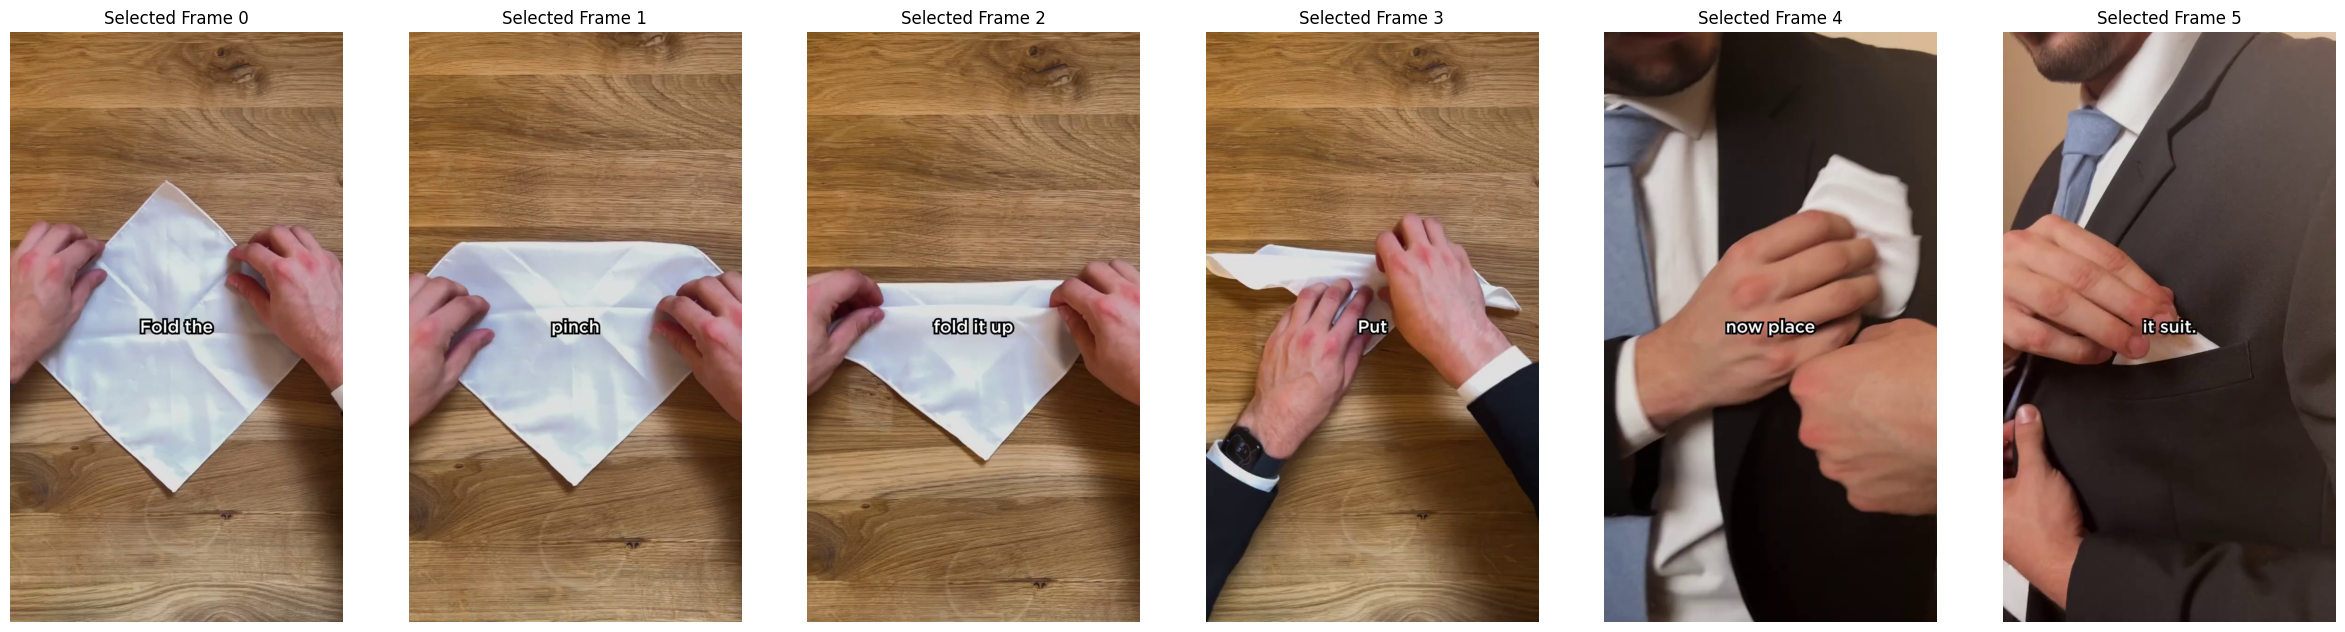

In [17]:
# Selected frames display
fig, axs = plt.subplots(1, len(selected_frames), figsize=(30, 10))

for i, frame in enumerate(selected_frames):
    axs[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Selected Frame {i}')
    axs[i].axis('off')

plt.show()

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF                                ;
    border-radius: 2px;      
    border: 2px solid #FFF6D8;">
    
The grayscale images are stored in `selected_frames` directory in png format

In [18]:
os.listdir('selected_frames')

['frame_0098.png',
 'frame_0169.png',
 'frame_0113.png',
 'frame_0264.png',
 'frame_0068.png',
 'frame_0281.png']

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF                                ;
    border-radius: 2px;       
    border: 2px solid #FFF6D8;">
    
Converting the images into PIL format for passing to the model

In [19]:
import PIL.Image
images = []
for i in os.listdir('selected_frames') :
    img = PIL.Image.open(f'selected_frames/{i}')
    images.append(img)

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF  ;                           ;
    border-radius: 2px;       
    border: 2px solid #FFF6D8;">
    
The image looks like this :

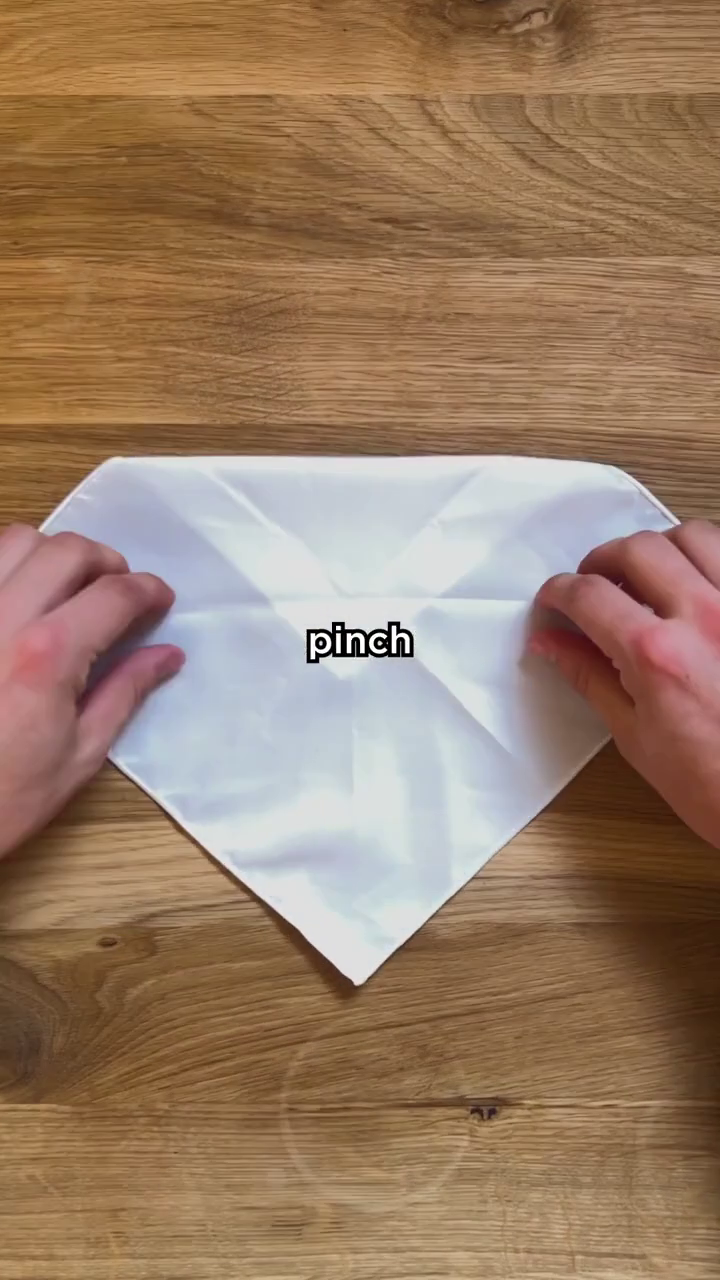

In [20]:
images[0]

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF                                ;
    border-radius: 2px;      
    border: 2px solid #FFF6D8;">
    
Generate text from image and text prompts using `gemini-pro-vision`. Calling the model :

In [21]:
model = genai.GenerativeModel('gemini-pro-vision')

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #17191e                                ;
    border-radius: 2px;
    color :  #FFFAEC  ;        
    border: 2px solid #FFF6D8;">
    
- Passing the instructions, prompts and some saved images  to the model for evaluation

In [22]:
instructions = "Instructions: Consider the following images:"
prompt1 = "What is shown in each of the images ?"
prompt2 = """
Answer the question through these steps:
Step 1: Identify if any text is written in the images
Step 2: Identify any doodles/pictures in the images
Step 3: Grasp the collective meaning of each of the images
Step 4: What does all the images tell as a whole about the personality of the person who wrote it?
Answer and describe the steps taken:
"""
images = images[0:4]

images.insert(0, prompt2)
images.insert(0, prompt1)
images.insert(0, instructions)
display(images)

responses = model.generate_content(images)

print("-------Prompt--------")
print(images)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


['Instructions: Consider the following images:',
 'What is shown in each of the images ?',
 '\nAnswer the question through these steps:\nStep 1: Identify if any text is written in the images\nStep 2: Identify any doodles/pictures in the images\nStep 3: Grasp the collective meaning of each of the images\nStep 4: What does all the images tell as a whole about the personality of the person who wrote it?\nAnswer and describe the steps taken:\n',
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280>]

-------Prompt--------
['Instructions: Consider the following images:', 'What is shown in each of the images ?', '\nAnswer the question through these steps:\nStep 1: Identify if any text is written in the images\nStep 2: Identify any doodles/pictures in the images\nStep 3: Grasp the collective meaning of each of the images\nStep 4: What does all the images tell as a whole about the personality of the person who wrote it?\nAnswer and describe the steps taken:\n', <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280 at 0x7CAEE3D1F430>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280 at 0x7CAEE3E966E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280 at 0x7CAEE3E965F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=720x1280 at 0x7CAEE3E96500>]

-------Response--------
 **Image 1:** The image shows a white handkerchief being folded into a diamond shape. The word "pinch" is written in the center of the image.

**Image 2:** The image shows the folde

<div class="anchor" id="top" style="
    margin-right: auto;
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #F9F1FF                              ;
    border-radius: 2px;      
    border: 2px solid #FFF6D8;">
    
References :
    
- [Gemini API Starter Notebook](https://www.kaggle.com/code/prathameshbang/gemini-api-starter-notebook/notebook)
- [Working with video in Python by Rob Mulla](https://www.kaggle.com/code/robikscube/working-with-video-in-python-youtube-tutorial/notebook)